# OSM24 Poster

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [3]:
font = {'family' : 'normal',
        'size'   : 24}

mpl.rc('font', **font)

### Motivation

In [4]:
#put glider plot here

In [5]:
glid_num = '659'
ds_rho = xr.open_dataset('/home/amf2288/argo-intern/SWIR_ACC_glider_tracer_analysis/data/sg_'+glid_num+'_iso_grid.nc')
ds_z   = xr.open_dataset('/home/amf2288/argo-intern/SWIR_ACC_glider_tracer_analysis/data/sg_'+glid_num+'_4m_binned.nc')

In [25]:
ds_z['spice'] = gsw.spiciness0(ds_z.SA,ds_z.CT).rename('spice')
ds_z.spice.attrs['standard_name'] = 'Spice'
ds_z.spice.attrs['units'] = ''
ds_z.spice.attrs['comment'] = 'calculated using gsw.spiciness0'
ds_z.spice.attrs['platform'] = ''
ds_z.spice.attrs['history'] = ''
ds_z.spice.attrs['outlier_lims'] = ''

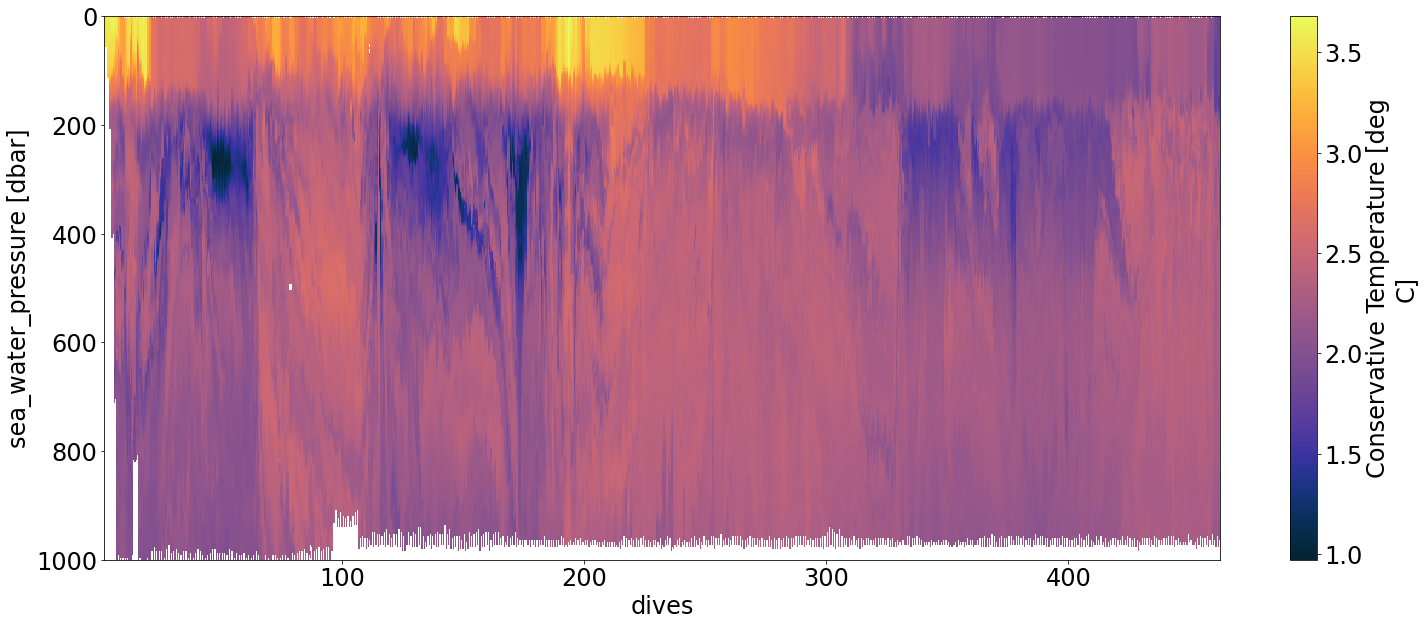

In [13]:
plt.figure(figsize=(25,10))
ds_z.CT.plot(y='ctd_pressure',cmap=cmo.thermal)
plt.gca().invert_yaxis()

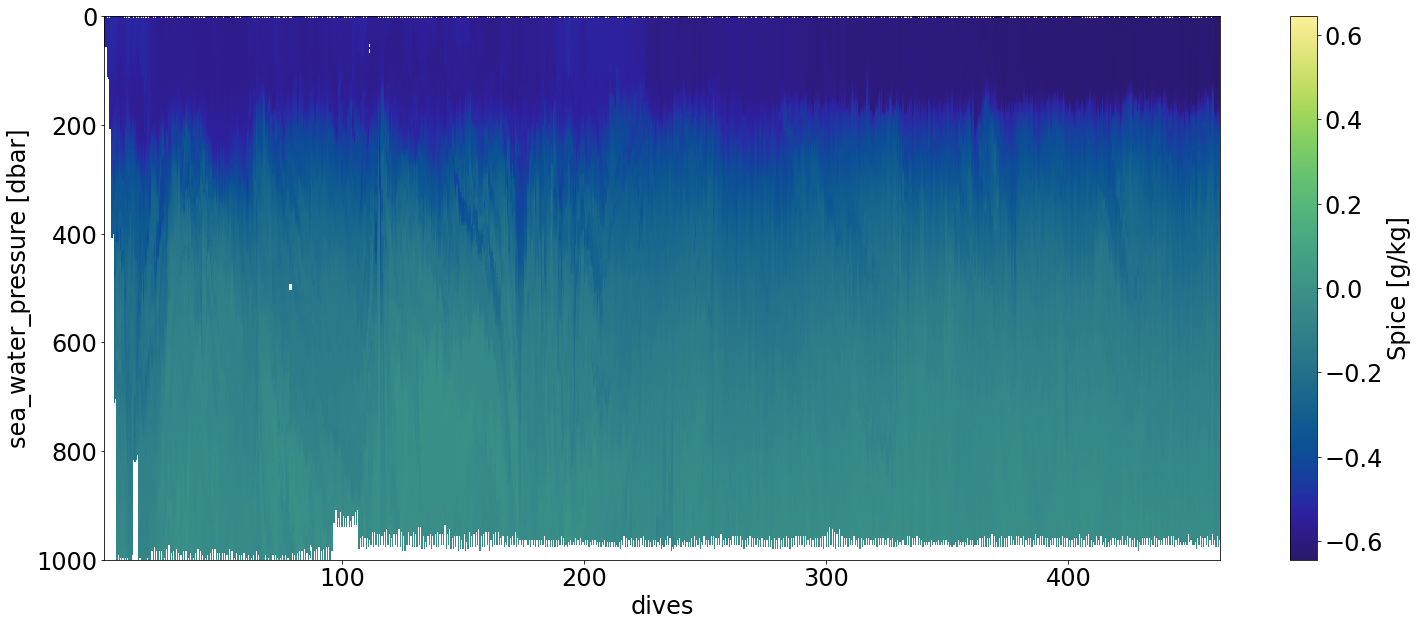

In [23]:
plt.figure(figsize=(25,10))
ds_z.spice.plot(y='ctd_pressure',cmap=cmo.haline)
plt.gca().invert_yaxis()

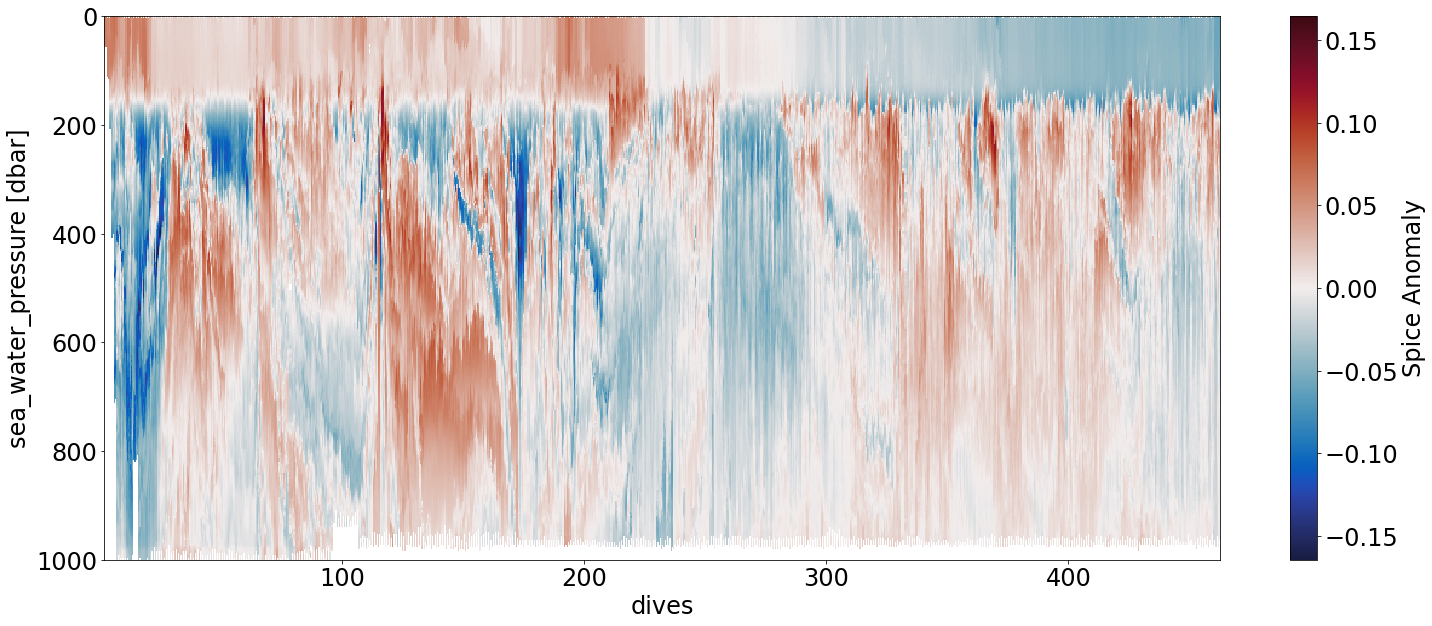

In [32]:
plt.figure(figsize=(25,10))
(ds_z.spice-ds_z.spice.mean('dives')).plot(y='ctd_pressure',cmap=cmo.balance,cbar_kwargs={'label': 'Spice Anomaly'})
plt.gca().invert_yaxis()

### Methods

In [51]:
#this will depend on how you end up plotting 

In [57]:
atl = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-20)_lat:(-70,70)_ds_z.nc')

In [58]:
temp_anom = atl.CT- atl.CT.mean('N_PROF')
psal_anom = atl.SA - atl.SA.mean('N_PROF')
spic_anom = atl.SPICE - atl.SPICE.mean('N_PROF')

atl = atl.assign(CT_anom=(['N_PROF','PRES_INTERPOLATED'],temp_anom.data))
atl = atl.assign(SA_anom=(['N_PROF','PRES_INTERPOLATED'],psal_anom.data))
atl = atl.assign(SPICE_anom=(['N_PROF','PRES_INTERPOLATED'],spic_anom.data))
atl

<xarray.Dataset>
Dimensions:            (N_PROF: 10970, PRES_INTERPOLATED: 500)
Coordinates:
  * N_PROF             (N_PROF) int64 1446 1429 1448 1431 ... 24199 23313 23841
    TIME               (N_PROF) datetime64[ns] ...
    LATITUDE           (N_PROF) float64 ...
    LONGITUDE          (N_PROF) float64 ...
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 4 8 12 ... 1988 1992 1996
    MLD                (N_PROF) int64 ...
    month              (N_PROF) int64 ...
    month_frac         (N_PROF) float64 ...
    year               (N_PROF) int64 ...
    year_frac          (N_PROF) float64 ...
Data variables: (12/15)
    CT                 (N_PROF, PRES_INTERPOLATED) float64 26.06 26.06 ... 3.017
    CYCLE_NUMBER       (N_PROF) int64 ...
    DATA_MODE          (N_PROF) object ...
    DIRECTION          (N_PROF) object ...
    PLATFORM_NUMBER    (N_PROF) int64 ...
    PRES               (N_PROF, PRES_INTERPOLATED) float32 ...
    ...                 ...
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 ...
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 ...
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 6.105 ... 0.1877
    CT_anom            (N_PROF, PRES_INTERPOLATED) float64 5.758 ... -0.1287
    SA_anom            (N_PROF, PRES_INTERPOLATED) float64 0.3188 ... -0.0154
    SPICE_anom         (N_PROF, PRES_INTERPOLATED) float64 1.654 ... -0.02839
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2024/02/15
    Fetched_constraints:  [x=-25.00/-20.00; y=-70.00/70.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

In [59]:
lfilter=100
atl_CT_anom_EKE = ef.get_EKE(atl,lfilter,variable='CT_anom')

AttributeError: module 'EV_funcs' has no attribute 'get_EKE'